In [3]:
import pandas as pd
import folium
import json
from folium import plugins

# Background
As COVID-19 continues to spread across the world, one of the greatest challenges to response efforts is a lack of data and evidence about infection and mortality rates. We will learn more about the virus and the  populations most at risk as more test kits arrive in the hands of physicians and the total number of cases becomes clearer. Ideally, this information will be used to help target response efforts, guide policy decisions, inform the donor community, and support decision-making by businesses and multinational organizations whose work spans multiple countries. As a global development company with staff in over ___ countries, this kind of information is invaluable, as we think about ways to support our staff, and prepare for what comes next.

Information from the earliest confirmed cases of COVID-19 indicates that some groups of people are at a higher risk for infection than others. Public health organizations like the WHO and US CDC have released warnings for those at higher risk to take extra precautionary measures. To help DAI and other global development organizations better understand vulnerabilities in the communities in which they work, the DAI Global Health and the Center for Digital Acceleration are tracking these risk factors, in addition to other potential correlates to mortality rates. 

In this first of a multi-part series, we will keep an updated record of demographic, socio-economic, and environmental factors that are perceived to being correlated with heightened risk of mortality and identify known country and subnational datasets that can help us identify countries at risk. We will also provide charts and maps to identify potential country level “hotspots.” 


# Theories

### (THIS SECTION WILL BE UPDATED AS WE LEARN MORE ABOUT RISK FACTORS)

Below is a list of factors that have emerged as known drivers of increasing risk of mortality. Some of these theories are based on information released by official public health bodies while others are factors that could be proxies. As we learn more about possible drivers from the medical community, we will update this analysis with new datasets when possible.
1.	People over the age of 65+ are at higher risk (CDC)
2.	People who smoke are at higher risk (CDC)
3.  People living in countries with higher air pollution are at higher risk
4.  People who have serious chronic medical conditions are at higher risk (CDC). These conditions include:
  1. Heart disease
  2. Diabetes
  3. Lung disease
5.	People who have hypertension are at higher risk (Bloomberg News)

In [4]:
factor_df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQ9Puqir6LrosixgUrjvXW09b58RzIsMOIdU1AmTqdTPM-Uki2nma39SGSN9ZzkqVQid8m6DT7nSHvq/pub?gid=0&single=true&output=csv')
factor_df.head()

,NAME_ENGLI,ID_0,ISO3,Population (2018),Covid_Infections,Covid_Deaths,pop_over_65,Air Pollution,CCKP Projected Median Temperatures for Jan 2020 (2012),DALYs Asthma (2017),...,Total Trade w USA(2017),Percent of Country Trade with China (2017),Percent of Country Trade with Italy (2017),Percent of Country Trade with S Korea (2017),Percent of Country Trade with USA (2017),Trade to GDP (2017),"DALYs, Cardiovascular Disease (2017)","DALYs, Chronic Respiratory Disease (2017)",Hospital Beds per 1000 people (2013),Physicians per 1000 people (2015)
0,Aruba,14,ABW,105845.0,NaN,NaN,13.550950,NaN,25.28,NaN,...,1.000000e+09,0.01090,0.00277,0.01380,0.4490,146.04880,NaN,NaN,NaN,NaN
1,Afghanistan,1,AFG,37172386.0,NaN,NaN,2.584927,56.91081,-1.72,0.01126,...,9.550000e+08,0.04630,0.00173,0.00637,0.0813,51.23688,0.100616,0.022054,0.5,0.2907
2,Angola,8,AGO,30809762.0,NaN,NaN,2.216374,32.38850,23.52,0.00818,...,3.360000e+09,0.47399,0.01490,0.01140,0.0727,52.25682,0.046202,0.017395,NaN,NaN
3,Anguilla,9,AIA,30809762.0,NaN,NaN,2.216374,32.38850,24.92,NaN,...,6.378128e+07,NaN,0.00297,0.00109,0.6080,NaN,NaN,NaN,NaN,NaN
4,Åland,3,ALA,30809762.0,NaN,NaN,2.216374,32.38850,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# read in covid data
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-16-2020.csv'
covid_df = pd.read_csv(url)

# Mapping

In [22]:
# load world geojson file
with open('countries.geojson') as f:
    world_area = json.load(f)

In [23]:
# function to create choropleth map with COVID case overlay
def create_map(factor_df, covid_df, variable_name, world_area):
    # initialize the map
    world_map = folium.Map(tiles='Mapbox Bright')
    
    # add choropleth base
    folium.Choropleth(
        geo_data=world_area,
        name=variable_name,
        data=factor_df,
        columns=['ISO3', variable_name],
        key_on='feature.properties.ISO_A3',
        fill_color='BuPu',
        fill_opacity=0.7,
        line_opacity=0.2,
        nan_fill_opacity=0,
        highlight=True,
        legend_name=variable_name).add_to(world_map)
    
    # add covid data - confirmed cases only
    #for i,row in covid_df.iterrows():
    #    if row.Confirmed != 0:
    #        tooltip = 'Country/Region: ' + row['Country/Region'] + '<br>' + 'Province/State: ' + str(row['Province/State'])+ '<br>' + 'Confirmed Cases: ' + str(row.Confirmed)
    #        folium.CircleMarker((row.Latitude,row.Longitude), radius=row.Confirmed/1000, color='red', fill_color='red', fill_opacity=.5, tooltip=tooltip).add_to(world_map)
    #folium.LayerControl().add_to(world_map)

    # save map as html for interactivity
    world_map.save('docs/'+variable_name+'.html')
    
    return None

In [24]:
    create_map(factor_df, covid_df, 'pop_over_65', world_area)

# Charting


In [7]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread
plt.style.use('ggplot')

In [16]:
# function to create standard bar chart
def create_bar(factor_df, variable_name):
    # sort by value & drop nulls
    factor2_df = factor_df.dropna(subset=[variable_name]).sort_values(by=[variable_name]).tail(25)
    
    # plot
    plt.figure(figsize=(8,8))
    plt.tight_layout()
    plt.barh(factor2_df['NAME_ENGLI'], factor2_df[variable_name], color='#a1c7e3')
    plt.xlabel('Percentage')
    
    # save as png
    plt.savefig('docs/'+variable_name +'_bar.png')
    return None

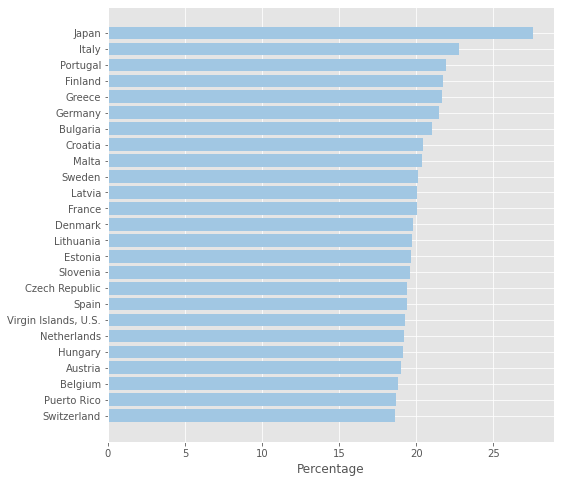

In [19]:
# loop through all variables and create bar charts
create_bar(factor_df, 'pop_over_65')

In [25]:
# histogram for factor 1
def create_hist(factor_df, variable_name):
    plt.figure(figsize=(8,8))
    plt.hist(factor_df[variable_name], bins=20, width=1, color='#a1c7e3')
    plt.xlabel('Percentage')
    plt.ylabel('Frequency')
    plt.title('Hypertension (%)')
    plt.savefig('docs/'+variable_name+'_hist.png')
    
    return None

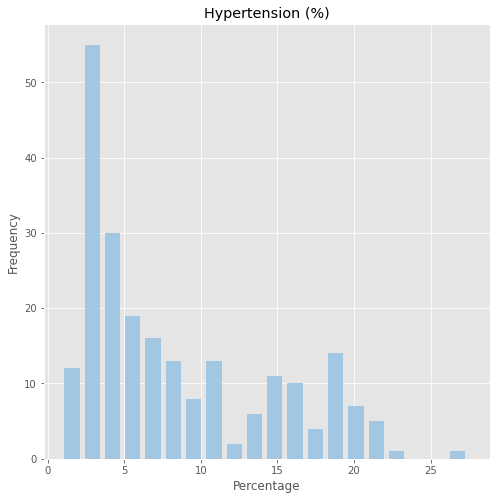

In [26]:
create_hist(factor_df, 'pop_over_65')

## Factor 1: Age
Age has been noted by all official public health organizations as a risk for getting very sick from COVID-19, specifically older adults. Data from the earliest cases in China, Italy, and South Korea have shown that mortality rates are higher among older adults. Using data from the World Bank in 2018, we looked at the percentage of the population aged 65 years old and older in each country. The map below shows the global distribution of these older adults - the darker color indicates a larger percentage of the country population while the lighter indicates a smaller percentage.

In [27]:
from IPython.display import Image, IFrame, HTML
IFrame(src='docs/pop_over_65.html', width=700, height=600)

Here we've ranked the top 25 countries by their population percentage of older adults. Japan tops the list at 27.6% while Italy ranks second in the world with over 22.8% of the country aged 65 years or older.

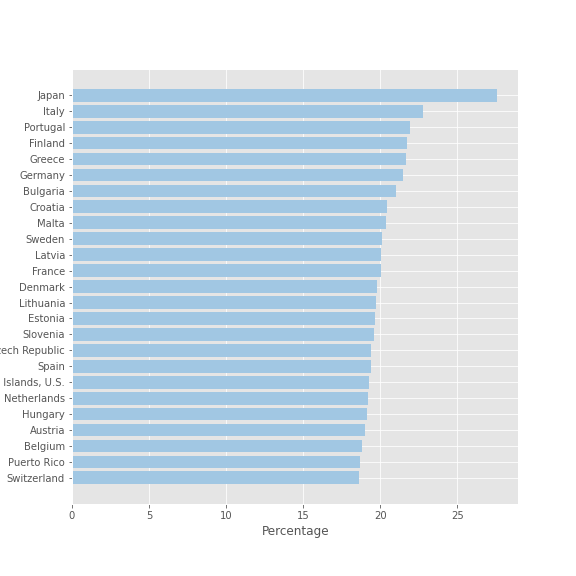

In [28]:
Image('docs/pop_over_65_bar.png')

Finally, we looked at the distribution of countries. Most countries have an older population that makes up between 0-13% of the entire country population. However, there is also a smaller group of countries with a slightly higher percentage of older adults - indicated by the second peak in the graph - ranging between 15-20% of the country population.

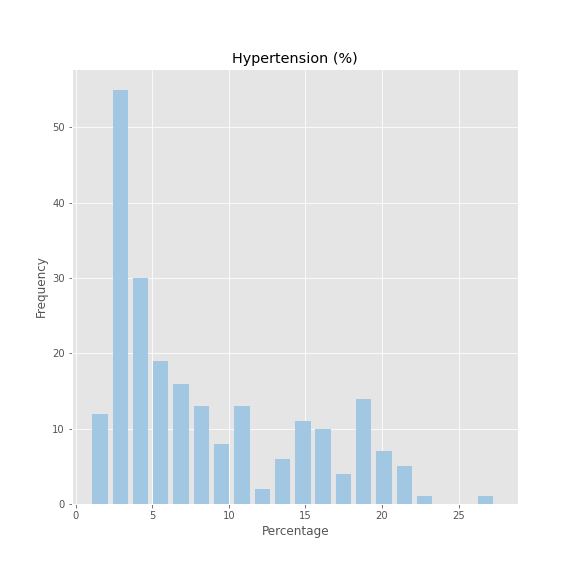

In [29]:
Image('docs/pop_over_65_hist.png')

# Underlying Medical Conditions
In addition to these demographic and external factors, the [WHO released warnings](https://www.who.int/images/default-source/health-topics/coronavirus/social-media-squares/be-safe.jpg) to people with underlying medical conditions to avoid crowded places as these conditions put people at greater risk for infection and death. These conditions specifically noted:
1. Cardiovascular (Heart) disease
2. Respiratory condition
3. Diabetes

We pulled data from the Global Burden of Disease Study 2017 on Disability Adjusted Life Years (DALYs) lost due to cardiovascular disease and chronic respiratory disease and World Bank data from 2019 on country prevalence of type 1 & 2 diabetes. DALYs are a commonly used measure of disease burden expressed as the number of years lost due to illness, disability, or early death.

## Factor 4: Cardiovascular Disease
The global distribution of DALYs due to cardiovascular diseases is shown below. From this, we can see that Eastern Europe is more affected by cardiovascular diseases, indicated by the darker purple color.

In [5]:
IFrame(src='docs/DALYs, Cardiovascular Disease (2017).html', width=700, height=600)

This can also be seen in our country rankings. The majority of countries with the highest number of DALYs due to cardiovascular disease are located in Eastern & Central Europe with Bulgaria and Ukraine topping the list.

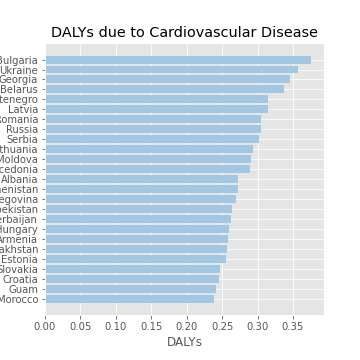

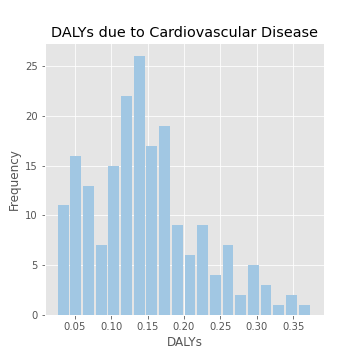

In [6]:
display(Image('docs/DALYs, Cardiovascular Disease (2017)_bar.png'), Image('docs/DALYs, Cardiovascular Disease (2017)_hist.png'))

Our last look at the burden of disease of cardiovascular disease indicates a large group of countries with DALYs falling in the 0.10-0.20 range. There are progessively fewer countries that have DALYs higher than 0.20.

## Factor 5: Respiratory Condition
Respiratory conditions put people at higher risk for COVID-19. [Symptoms of the virus](https://www.sciencedirect.com/science/article/pii/S0896841120300469?via%3Dihub) include pneumonia, sneezing, and sore throat - all conditions that affect the respiratory system. We used data from the Global Burden of Disease Study 2017 to identify disease burden (measured in DALYs) due to all chronic respiratory diseases. This broader category of diseases includes silicosis, asthma, and lung disease.

No major trends appear in the map below. We can see a mild concentration of respiratory conditions in Southeast Asia. North Korea and Papua New Guinea, however, are most affected by these conditions.

In [7]:
IFrame(src='docs/DALYs, Chronic Respiratory Disease (2017).html', width=700, height=600)

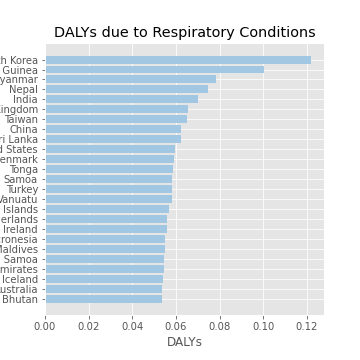

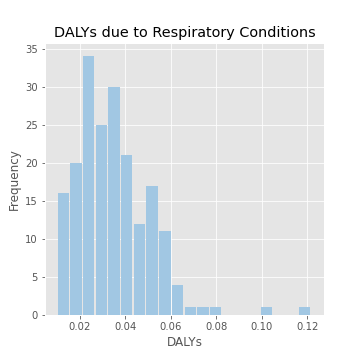

In [8]:
display(Image('docs/DALYs, Chronic Respiratory Disease (2017)_bar.png'), Image('docs/DALYs, Chronic Respiratory Disease (2017)_hist.png'))

# Factor 6: Diabetes

In [9]:
IFrame(src='docs/Prevalence Diabetes (2019).html', width=700, height=600)

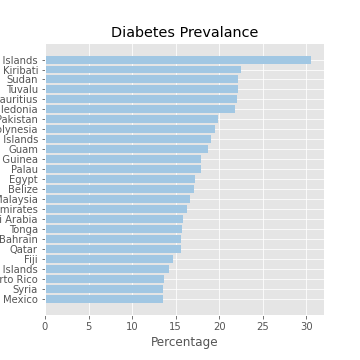

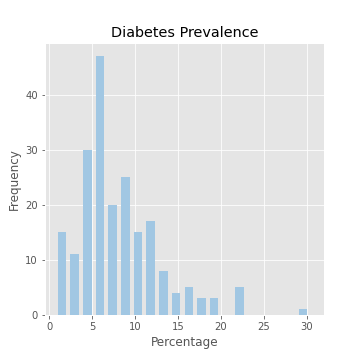

In [10]:
display(Image('docs/Prevalence Diabetes (2019)_bar.png'), Image('docs/Prevalence Diabetes (2019)_hist.png'))

# Factor 7: Hypertension
Hypertension, also known as high blood pressure, is the last medical condition that we are looking at. 

In [12]:
IFrame(src='docs/Percent High Blood Pressure (2015).html', width=700, height=600)

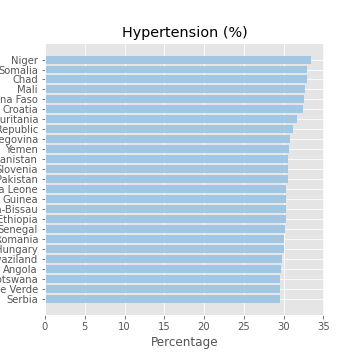

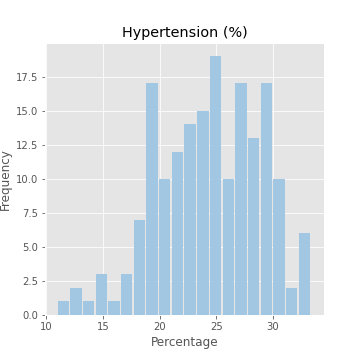

In [14]:
display(Image('docs/Percent High Blood Pressure (2015)_bar.png'), Image('docs/Percent High Blood Pressure (2015)_hist.png'))